In [122]:
#https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption

In [123]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import datetime
import time
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [125]:
lbl_encoder = LabelEncoder()
df['WeekStatus'] = lbl_encoder.fit_transform(df['WeekStatus'])
df['Day_of_week'] = lbl_encoder.fit_transform(df['Day_of_week'])
df['Load_Type'] = lbl_encoder.fit_transform(df['Load_Type'])

In [126]:
def time_to_sec(x):
    x = time.strptime(str(x), '%H:%M:%S')
    res = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return res

In [127]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

df['day'] = pd.to_datetime(df['date']).dt.day_of_year
df['month'] = pd.to_datetime(df['date']).dt.month
df['time'] = pd.to_datetime(df['date']).dt.time

df['day'] = pd.to_numeric(df['day'])
df['month'] = pd.to_numeric(df['month'])

df['time'] = df['time'].apply(lambda x: time_to_sec(x))

df = df.drop('date', axis=1)

df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,time
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0,1,1,900.0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0,1,1,1800.0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0,1,1,2700.0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0,1,1,3600.0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0,1,1,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0,365,12,82800.0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0,365,12,83700.0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0,365,12,84600.0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0,365,12,85500.0


In [128]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

In [129]:
n = 1000
nu = 0.1
trees = []
PARAMS = ['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'day', 'month', 'time']
df_train['y_pred'] = df_train['Usage_kWh'].mean()

for i in range(n):
    df_train['r'] = df_train['Usage_kWh'] - df_train['y_pred']
    tree = DecisionTreeRegressor(max_depth=5)
    tree.fit(df_train[PARAMS], df_train['r'])
    df_train['y_pred'] += nu * tree.predict(df_train[PARAMS])
    trees.append(tree)
df_train

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,time,y_pred,r
18068,2.77,4.36,0.00,0.00,53.62,100.00,18900,1,3,0,189,7,18900.0,2.763316,0.006679
29417,88.88,28.15,0.00,0.04,95.33,100.00,37800,1,2,1,307,11,37800.0,88.932608,-0.052612
20820,3.13,0.00,16.31,0.00,100.00,18.85,76500,1,3,0,217,8,76500.0,3.133868,-0.003872
6676,30.64,0.54,2.09,0.01,99.98,99.77,47700,1,3,1,70,3,47700.0,30.338978,0.301018
5654,5.80,0.00,25.88,0.00,100.00,21.87,78300,0,6,2,59,2,78300.0,5.849836,-0.049840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26897,2.70,5.18,0.00,0.00,46.22,100.00,16200,0,1,0,281,10,16200.0,2.681058,0.018938
24057,52.60,21.85,0.00,0.02,92.35,100.00,52200,1,2,1,251,9,52200.0,52.088303,0.511693
33534,3.89,2.77,0.00,0.00,81.46,100.00,27900,1,3,0,350,12,27900.0,4.064436,-0.174440
219,4.54,4.28,0.00,0.00,72.76,100.00,25200,0,6,0,3,1,25200.0,4.619629,-0.079633


In [130]:
df_test['y_pred'] = df_test['Usage_kWh'].mean()
for tree in trees:
    df_test['y_pred'] += nu * tree.predict(df_test[PARAMS])
df_test['r'] = df_test['Usage_kWh'] - df_test['y_pred']
df_test

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,time,y_pred,r
8,3.28,3.64,0.00,0.0,66.94,100.00,8100,0,1,0,1,1,8100.0,2.671877,0.608123
21,3.56,4.10,0.00,0.0,65.56,100.00,19800,0,1,0,1,1,19800.0,2.982118,0.577882
27,3.31,3.53,0.00,0.0,68.40,100.00,25200,0,1,0,1,1,25200.0,2.699004,0.610996
36,3.60,0.00,16.96,0.0,100.00,20.76,33300,0,1,0,1,1,33300.0,3.268247,0.331753
38,3.92,0.00,19.22,0.0,100.00,19.98,35100,0,1,0,1,1,35100.0,3.446550,0.473450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35025,3.38,0.00,13.43,0.0,100.00,24.41,73800,0,1,0,365,12,73800.0,2.865324,0.514676
35029,3.49,0.00,13.36,0.0,100.00,25.27,77400,0,1,0,365,12,77400.0,2.936352,0.553648
35031,3.42,0.00,13.07,0.0,100.00,25.31,79200,0,1,0,365,12,79200.0,2.864907,0.555093
35033,3.67,4.43,0.00,0.0,63.80,100.00,81000,0,1,0,365,12,81000.0,3.068109,0.601891


In [131]:
print(f'MAE train: {mean_absolute_error(df_train['Usage_kWh'], df_train['y_pred'])}')
print(f'MAE test: {mean_absolute_error(df_test['Usage_kWh'], df_test['y_pred'])}')

MAE train: 0.16611930409181594
MAE test: 0.6976986961523401


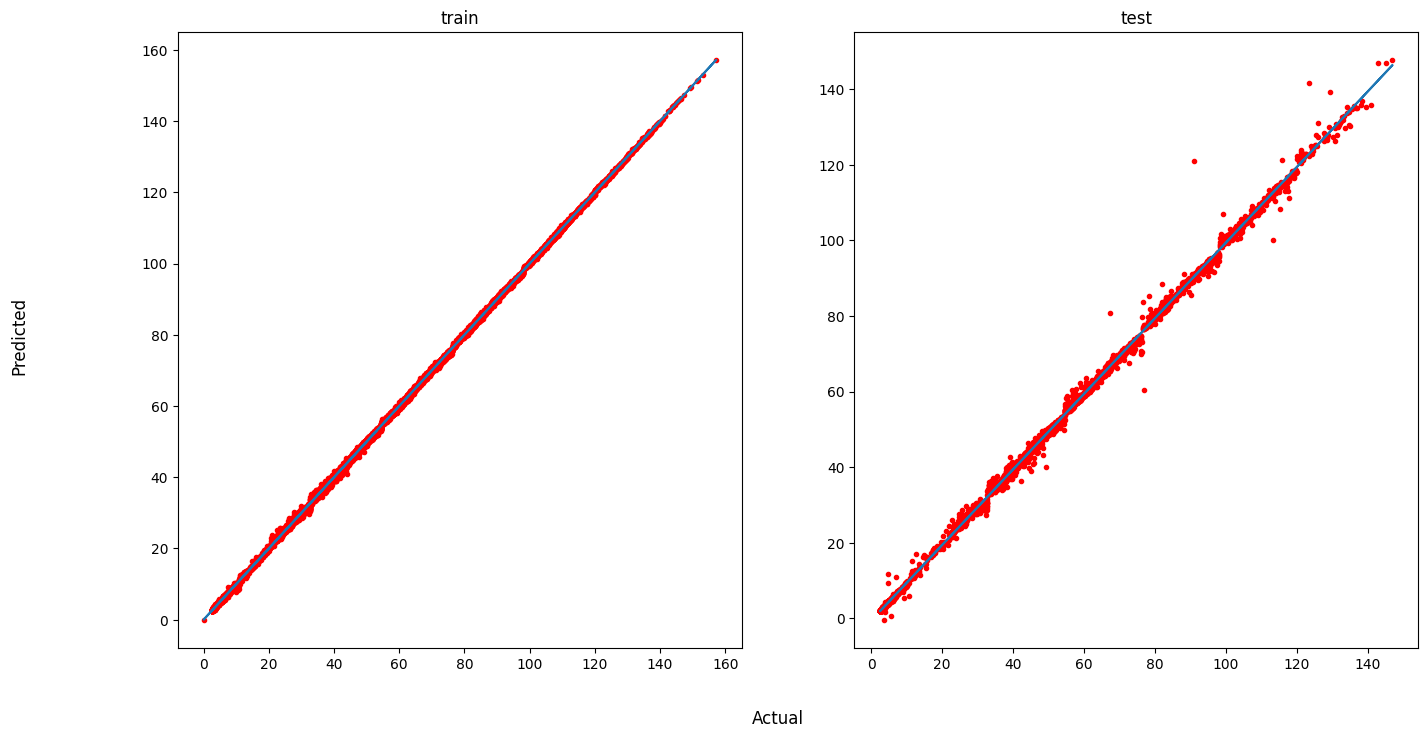

In [164]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 8)
fig.supxlabel('Actual')
fig.supylabel('Predicted')

x_train = df_train['Usage_kWh']
y_train = df_train['y_pred']

ax1.plot(x_train, y_train, '.', color = 'r')
m, b = np.polyfit(x_train, y_train, 1)
ax1.plot(x_train, m * x_train + b)
ax1.title.set_text('train')

x_test = df_test['Usage_kWh']
y_test = df_test['y_pred']

ax2.plot(x_test, y_test, '.', color = 'r')
m, b = np.polyfit(x_test, y_test, 1)
ax2.plot(x_test, m * x_test + b)
ax2.title.set_text('test')
